In [1]:
import tensorflow
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2

In [2]:
(X_train, y_train),( X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


training dataset - 60000 handwritten images of size (28X28)

In [3]:
X_train.shape

(60000, 28, 28)

labels - numbers between 0-9

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

test dataset - 10000 handwritten images of size (28X28)

In [5]:
X_test.shape

(10000, 28, 28)

input Features and class labels of 1st 5 images

In [6]:
X_train[0:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [7]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Visualizing images

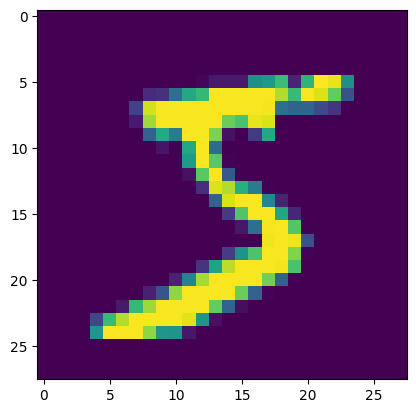

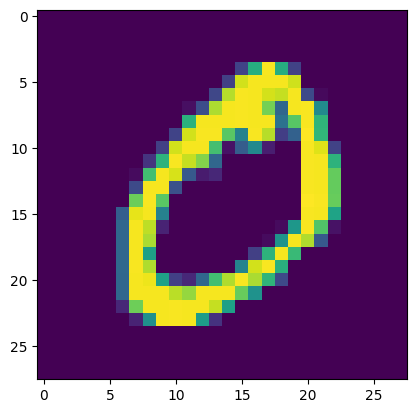

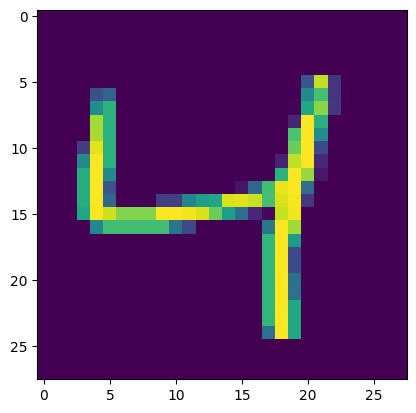

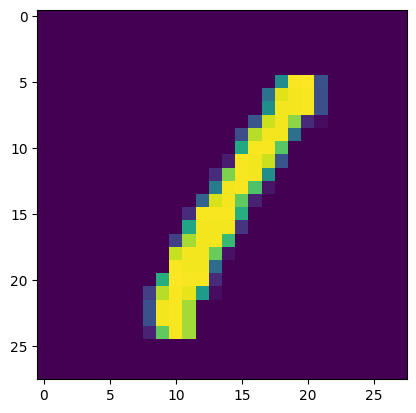

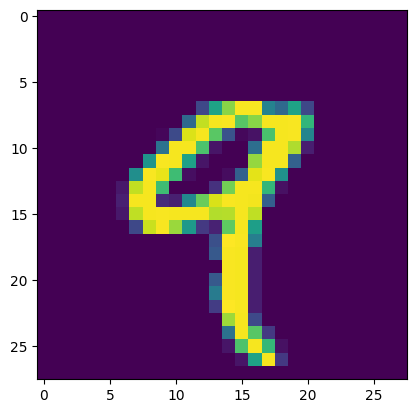

In [8]:
for i in range(0,5):
  plt.imshow(X_train[i])
  plt.show()

Normalizing data between 0-1

In [9]:
X_train = X_train/255
X_test = X_test/255

Image after normalization

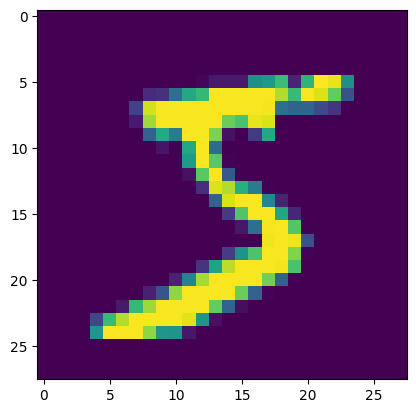

In [10]:
plt.imshow(X_train[0])

Model

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [12]:

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=2,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
Dropout(0.2)
model.add(Dense(128, activation='relu'))
Dropout(0.2)
# model.add(Dense(32, activation='relu'))
# Dropout(0.2)
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Training model

In [16]:
history = model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8631 - loss: 0.4559 - val_accuracy: 0.9629 - val_loss: 0.1233
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9669 - loss: 0.1087 - val_accuracy: 0.9684 - val_loss: 0.1002
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9782 - loss: 0.0678 - val_accuracy: 0.9710 - val_loss: 0.0988
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9831 - loss: 0.0530 - val_accuracy: 0.9743 - val_loss: 0.0920
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9883 - loss: 0.0373 - val_accuracy: 0.9747 - val_loss: 0.0937


Prediction on test data

In [17]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
y_pred[0]

array([6.8219665e-09, 7.5491300e-08, 1.3471958e-05, 2.7810171e-05,
       7.6094400e-12, 4.4569315e-08, 7.5576400e-13, 9.9995774e-01,
       1.0213719e-07, 6.8959412e-07], dtype=float32)

In [19]:
y_pred = y_pred.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
y_pred[0]

7

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9767

Variation of loss in each epoch

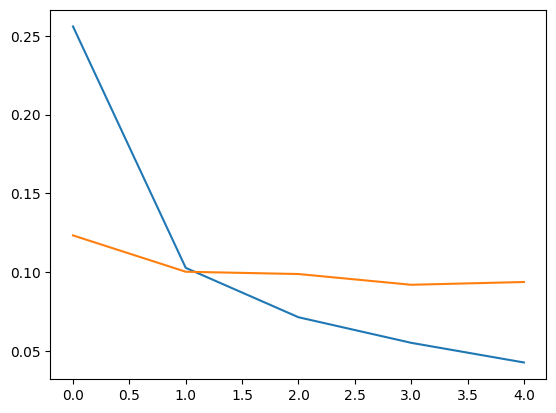

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Variation of accuracy in each epoch

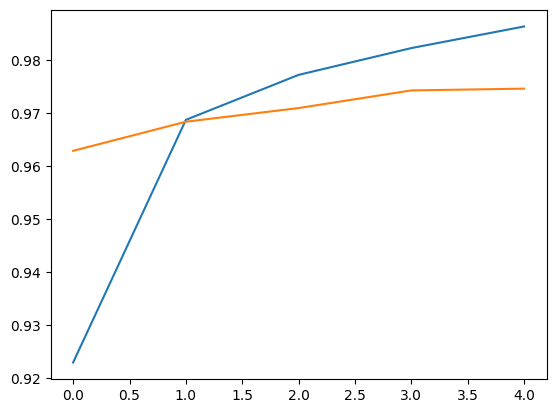

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Converting an image into array

In [77]:
import cv2
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)   #reads img and converts into grayscale
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)    #inverts pixel value (white number written in black background)
    img = img.astype('float32') / 255.0
    img_array = img.reshape(1,28,28)
    return img_array


image_path = "/content/seven.jpeg"
pixel_array = preprocess_image(image_path)

In [63]:
#pixel_array

prediction of image

In [78]:
prediction = model.predict(pixel_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [79]:
np.argmax(prediction)

7